<a href="https://colab.research.google.com/github/poojasaxena/tensorflow-developer-zertificate-coursera/blob/main/course2_convolutional-neural-networks-tensorflow/04_multiclass-classifications/Course_2_Part_8_Lesson_4_Notebook_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Setup dataset

### Step 1. import basic libraries

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


### Step 2. Upload the dataset

In [37]:
cif10 = datasets.cifar10
type(cif10)

module

In [38]:
#?cif10.load_data

In [39]:
(train_images, train_labels), (test_images, test_labels) = cif10.load_data()

In [40]:
print('trainng image: ',train_images.shape)
print('trainig label', train_labels.shape)
print('testing image', test_images.shape)
print('testing label',test_labels.shape)

print('distinct images in dataset: ', np.unique(train_labels))

trainng image:  (50000, 32, 32, 3)
trainig label (50000, 1)
testing image (10000, 32, 32, 3)
testing label (10000, 1)
distinct images in dataset:  [0 1 2 3 4 5 6 7 8 9]


### Step 3. Check dataset

Label of indx 4 :  1


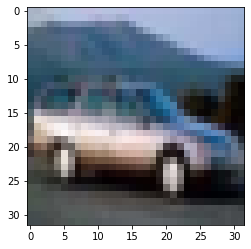

In [41]:
import matplotlib.pyplot as plt

indx=4
plt.imshow(train_images[indx])
print('Label of indx',indx,': ',train_labels[indx][0])

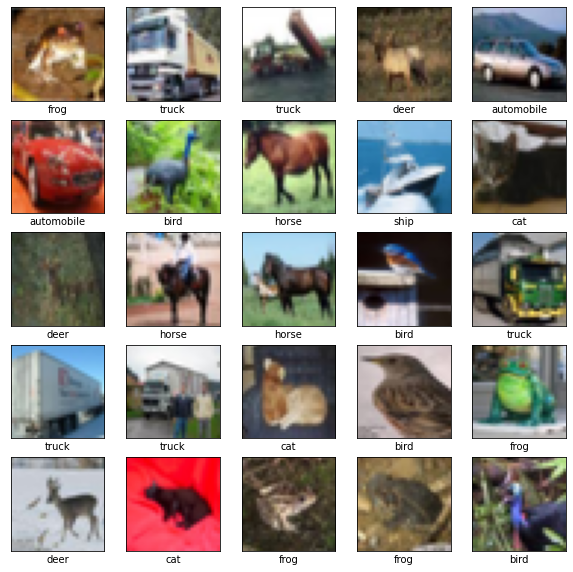

In [42]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Step 4. Data preprocessing

In [43]:
# Normalize pixel values to be between 0 and 1
from tensorflow.keras.utils import to_categorical

train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, len(np.unique(train_labels)))
test_labels = to_categorical(test_labels, len(np.unique(test_labels)))

## 2. Model decleration

In [44]:
## As input, a CNN takes a shape (image_height, image_width, color_channels)
def create_model(dense_neurons=64, L1=0):
    model= tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(dense_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=L1)),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [45]:
model_1 = create_model()
history_1 = model_1.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7782 - accuracy: 0.3357 - val_loss: 1.3338 - val_accuracy: 0.5109
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2683 - accuracy: 0.5477 - val_loss: 1.1688 - val_accuracy: 0.5809
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0903 - accuracy: 0.6175 - val_loss: 1.0637 - val_accuracy: 0.6233
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9932 - accuracy: 0.6488 - val_loss: 1.0261 - val_accuracy: 0.6394
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9095 - accuracy: 0.6807 - val_loss: 0.9800 - val_accuracy: 0.6558
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8638 - accuracy: 0.6980 - val_loss: 0.9053 - val_accuracy: 0.6867
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8045 - accuracy: 0.7161 - val_loss: 0.8889 - val_accuracy:

### Exercise 1. Increase model complexity 
The last exercise of increaseing the train-more let us increase the training accuracy from 79% to 90%, validation accuracy however remain constant at 70%, or maybe marginal decrease from 70% -> 68%
Regarding the error, its very clear that though the trainig error keep on decreasing, validation error start rising from epoch 10.

Lets try another approach of increasing the model complexity, so that we could gain more accuracy on training/validation

In [46]:
## Add additional MaxPool(2,2) and more layers in Dense 
model_2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.summary()
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)             

In [47]:
## Add additional MaxPool(2,2) and more layers in Dense 
model_3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_3.summary()
model_3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_3 = model_3.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 256)             

### Exercise 2 : Increase dense neurons

In [ ]:
model_4 = create_model(dense_neurons=512)
history_4 = model_4.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1563/1563 [==============================] - 22s 14ms/step - loss: 1.6729 - accuracy: 0.3854 - val_loss: 1.1366 - val_accuracy: 0.5927
Epoch 2/12
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0906 - accuracy: 0.6139 - val_loss: 1.0531 - val_accuracy: 0.6190
Epoch 3/12
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8990 - accuracy: 0.6811 - val_loss: 0.9658 - val_accuracy: 0.6645
Epoch 4/12
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7681 - accuracy: 0.7313 - val_loss: 0.8910 - val_accuracy: 0.6887
Epoch 5/12
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6499 - accuracy: 0.7711 - val_loss: 0.8931 - val_accuracy: 0.6982
Epoch 6/12
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5529 - accuracy: 0.8041 - val_loss: 0.8560 - val_accuracy: 0.7150
Epoch 7/12
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4584 - accuracy: 0.8386 - val_loss: 0.9189 -

### Exercise 3: Using Regularization method (drop-out)
As increaseing the model complexity (more Dense Layer and more learning time) made us acheive 96% of training efficiency, however the test data efficiency remins at 70%, i.e. we are doing overfitting.

Hence, lets choose the epoch till 12 and add DROP-OUT regularization method to not overlearn for trainig data.

In [25]:
## Add additional MaxPool(2,2) and more layers in Dense 
model_5= tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_5.summary()
model_5.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history_5 = model_5.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

### Exercise 4: Using Only L1 Regularization
As we see making the complex model along with the Regularization method does improve the difference between both dataset. However, we falls to 60% accuracy for both dataset and error seems not to be improving. ie. the model is not learning anything new with new epochs.

In [ ]:
l1=[0.1,0.01, 0.001,0.0001]
for index, value in enumerate(l1):
    print(index, value)
    history=[]
    model[index] = create_model(l1=value)
    history_temp[index] = model[index].fit(train_images, train_labels, epochs=12, 
                                           validation_data=(test_images, test_labels))
    history.append(history_temp[index])


0 0.1
1 0.01
2 0.001
3 0.0001


In [ ]:
## Add additional MaxPool(2,2) and more layers in Dense 
model_7 = create_model(L1=0.1)
history_7 = model_7.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1563/1563 [==============================] - 19s 12ms/step - loss: 22.5016 - accuracy: 0.1598 - val_loss: 2.7720 - val_accuracy: 0.2754
Epoch 2/12
1563/1563 [==============================] - 22s 14ms/step - loss: 2.7464 - accuracy: 0.2868 - val_loss: 2.6501 - val_accuracy: 0.3234
Epoch 3/12
1563/1563 [==============================] - 23s 14ms/step - loss: 2.5773 - accuracy: 0.3538 - val_loss: 2.4834 - val_accuracy: 0.3882
Epoch 4/12
1563/1563 [==============================] - 23s 15ms/step - loss: 2.5067 - accuracy: 0.3825 - val_loss: 2.4389 - val_accuracy: 0.4019
Epoch 5/12
1563/1563 [==============================] - 23s 15ms/step - loss: 2.4554 - accuracy: 0.3967 - val_loss: 2.4196 - val_accuracy: 0.4112
Epoch 6/12
1563/1563 [==============================] - 24s 15ms/step - loss: 2.4269 - accuracy: 0.4190 - val_loss: 2.4293 - val_accuracy: 0.4263
Epoch 7/12
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3868 - accuracy: 0.4351 - val_loss: 2.3345 

In [ ]:
## Add additional MaxPool(2,2) and more layers in Dense 
model_8 = create_model(L1=0.01)
history_8 = model_8.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1563/1563 [==============================] - 21s 13ms/step - loss: 4.1153 - accuracy: 0.2626 - val_loss: 1.7893 - val_accuracy: 0.4090
Epoch 2/12
1563/1563 [==============================] - 22s 14ms/step - loss: 1.7371 - accuracy: 0.4252 - val_loss: 1.6893 - val_accuracy: 0.4372
Epoch 3/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.6249 - accuracy: 0.4699 - val_loss: 1.5877 - val_accuracy: 0.4771
Epoch 4/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5645 - accuracy: 0.4908 - val_loss: 1.5524 - val_accuracy: 0.4941
Epoch 5/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5028 - accuracy: 0.5171 - val_loss: 1.5700 - val_accuracy: 0.4935
Epoch 6/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4595 - accuracy: 0.5309 - val_loss: 1.4048 - val_accuracy: 0.5463
Epoch 7/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.4058 - accuracy: 0.5504 - val_loss: 1.4197 -

In [ ]:
model_9 = create_model(L1=0.001)
history_9 = model_9.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1563/1563 [==============================] - 27s 17ms/step - loss: 2.1553 - accuracy: 0.3254 - val_loss: 1.4904 - val_accuracy: 0.4882
Epoch 2/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.4708 - accuracy: 0.5127 - val_loss: 1.3671 - val_accuracy: 0.5527
Epoch 3/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3198 - accuracy: 0.5711 - val_loss: 1.2462 - val_accuracy: 0.6063
Epoch 4/12
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2282 - accuracy: 0.6103 - val_loss: 1.2208 - val_accuracy: 0.6085
Epoch 5/12
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1696 - accuracy: 0.6310 - val_loss: 1.1901 - val_accuracy: 0.6233
Epoch 6/12
1563/1563 [==============================] - 24s 16ms/step - loss: 1.1165 - accuracy: 0.6539 - val_loss: 1.1264 - val_accuracy: 0.6503
Epoch 7/12
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0763 - accuracy: 0.6680 - val_loss: 1.0775 -

In [ ]:
## Add additional MaxPool(2,2) and more layers in Dense 
model_10 = create_model(L1=0.0001)
history_10 = model_10.fit(train_images, train_labels, epochs=12, 
                    validation_data=(test_images, test_labels))

Epoch 1/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.8247 - accuracy: 0.3601 - val_loss: 1.3491 - val_accuracy: 0.5416
Epoch 2/12
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2520 - accuracy: 0.5838 - val_loss: 1.1393 - val_accuracy: 0.6276
Epoch 3/12
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0925 - accuracy: 0.6458 - val_loss: 1.0604 - val_accuracy: 0.6631
Epoch 4/12
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9830 - accuracy: 0.6814 - val_loss: 1.0143 - val_accuracy: 0.6770
Epoch 5/12
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9092 - accuracy: 0.7148 - val_loss: 0.9782 - val_accuracy: 0.6914
Epoch 6/12
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8579 - accuracy: 0.7318 - val_loss: 1.0183 - val_accuracy: 0.6811
Epoch 7/12
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8283 - accuracy: 0.7409 - val_loss: 0.9809 -

### Exercise 5: Data Augmentation
As the Regularization helps to control overfitting, however the accuracy is still not good enough. Lets try Augmentation

In [ ]:
def visualize_data(images, categories, class_names):
    fig = plt.figure(figsize=(14, 6))
    fig.patch.set_facecolor('white')
    for i in range(3 * 7):
        plt.subplot(3, 7, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
        class_index = categories[i].argmax()
        plt.xlabel(class_names[class_index])
    plt.show()

In [ ]:
### Train with batch size
batch_size=32
epochs=16

model_11=create_model()
history_11 = model_11.fit(train_images, train_labels,
                                 epochs=epochs, batch_size=batch_size,
                                 validation_data=(test_images, test_labels))

Epoch 1/16
1563/1563 [==============================] - 25s 16ms/step - loss: 1.7400 - accuracy: 0.3523 - val_loss: 1.2589 - val_accuracy: 0.5491
Epoch 2/16
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1920 - accuracy: 0.5775 - val_loss: 1.0514 - val_accuracy: 0.6306
Epoch 3/16
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0259 - accuracy: 0.6352 - val_loss: 1.0028 - val_accuracy: 0.6451
Epoch 4/16
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9217 - accuracy: 0.6772 - val_loss: 0.9599 - val_accuracy: 0.6639
Epoch 5/16
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8309 - accuracy: 0.7095 - val_loss: 0.9089 - val_accuracy: 0.6874
Epoch 6/16
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7711 - accuracy: 0.7300 - val_loss: 0.8608 - val_accuracy: 0.6989
Epoch 7/16
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7101 - accuracy: 0.7502 - val_loss: 0.8588 -

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## train with Augmentation
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )

model_12 =create_model()
datagen.fit(train_images)

history_12 = model_12.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    epochs=epochs,
    validation_data=(test_images, test_labels))

Epoch 1/16
1563/1563 [==============================] - 34s 21ms/step - loss: 1.8081 - accuracy: 0.3283 - val_loss: 1.2686 - val_accuracy: 0.5445
Epoch 2/16
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3382 - accuracy: 0.5186 - val_loss: 1.1631 - val_accuracy: 0.5872
Epoch 3/16
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1821 - accuracy: 0.5795 - val_loss: 1.1378 - val_accuracy: 0.6009
Epoch 4/16
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0911 - accuracy: 0.6139 - val_loss: 0.9599 - val_accuracy: 0.6641
Epoch 5/16
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0302 - accuracy: 0.6338 - val_loss: 0.9350 - val_accuracy: 0.6702
Epoch 6/16
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9815 - accuracy: 0.6527 - val_loss: 0.8880 - val_accuracy: 0.6897
Epoch 7/16
1563/1563 [==============================] - 37s 23ms/step - loss: 0.9559 - accuracy: 0.6636 - val_loss: 0.8934 -

### Exercise 6:   VGG Model
Lets try using different model to check the difference in the accuracy

In [ ]:
def create_vgg_model():
    model= tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same',input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
        
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
        
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
### Train w/o Data Augmentation
model_13=create_vgg_model()
history_13 = model_13.fit(train_images, train_labels,
                                 epochs=epochs, batch_size=batch_size,
                                 validation_data=(test_images, test_labels))

Epoch 1/16
1563/1563 [==============================] - 118s 75ms/step - loss: 1.7868 - accuracy: 0.3349 - val_loss: 1.2345 - val_accuracy: 0.5604
Epoch 2/16
1563/1563 [==============================] - 119s 76ms/step - loss: 1.0678 - accuracy: 0.6188 - val_loss: 0.8834 - val_accuracy: 0.6881
Epoch 3/16
1563/1563 [==============================] - 119s 76ms/step - loss: 0.7901 - accuracy: 0.7180 - val_loss: 0.7687 - val_accuracy: 0.7315
Epoch 4/16
1563/1563 [==============================] - 119s 76ms/step - loss: 0.6370 - accuracy: 0.7777 - val_loss: 0.7903 - val_accuracy: 0.7341
Epoch 5/16
1563/1563 [==============================] - 119s 76ms/step - loss: 0.5420 - accuracy: 0.8077 - val_loss: 0.7780 - val_accuracy: 0.7358
Epoch 6/16
1563/1563 [==============================] - 119s 76ms/step - loss: 0.4482 - accuracy: 0.8423 - val_loss: 0.7269 - val_accuracy: 0.7594
Epoch 7/16
1563/1563 [==============================] - 123s 79ms/step - loss: 0.3743 - accuracy: 0.8686 - val_loss: 0

## Exercise Lets undestand the augmeantion parameter

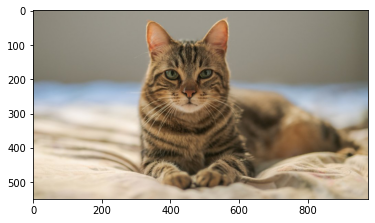

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image=load_img('/home/pooja/Desktop/cat.jpg')
image=img_to_array(image).astype(int)
data=np.expand_dims(image, 0)
plt.imshow(data[0])

In [ ]:
def default_datagen():
    '''Returns a default ImageDataGenerator without any transformation enabled.'''
    datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
    datagen.fit(data)
    return datagen

In [ ]:
def plot_augmented_image(datagen, data, n_rows=1, n_cols=5):
    n_images = n_rows * n_cols
    gen_flow = datagen.flow(data)
    
    plt.figure(figsize=(n_cols*4, n_rows*4))
    for image_index in range(n_images):
        image = next(gen_flow)
        plt.subplot(n_rows, n_cols, image_index+1)
        plt.axis('off')
        plt.imshow(image[0], vmin=0, vmax=225)  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


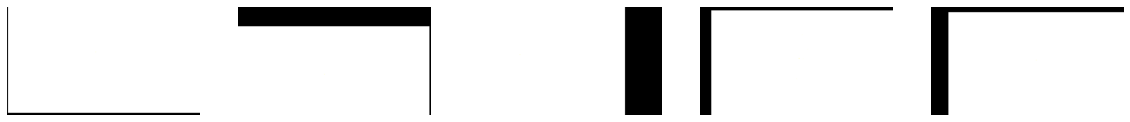

In [ ]:
datagen = default_datagen()
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
plot_augmented_image(datagen, data)

In [ ]:
## train with Augmentation
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )

model_14 =create_vgg_model()
datagen.fit(train_images)

history_14 = model_14.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    epochs=20,
    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 126s 81ms/step - loss: 1.8331 - accuracy: 0.3117 - val_loss: 1.2501 - val_accuracy: 0.5518
Epoch 2/20
1563/1563 [==============================] - 126s 80ms/step - loss: 1.2187 - accuracy: 0.5618 - val_loss: 1.0557 - val_accuracy: 0.6284
Epoch 3/20
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9993 - accuracy: 0.6467 - val_loss: 0.9027 - val_accuracy: 0.6866
Epoch 4/20
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8606 - accuracy: 0.6990 - val_loss: 0.8717 - val_accuracy: 0.7075
Epoch 5/20
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7853 - accuracy: 0.7225 - val_loss: 0.8105 - val_accuracy: 0.7270
Epoch 6/20
1563/1563 [==============================] - 126s 80ms/step - loss: 0.7343 - accuracy: 0.7416 - val_loss: 0.6981 - val_accuracy: 0.7587
Epoch 7/20
1563/1563 [==============================] - 126s 80ms/step - loss: 0.6898 - accuracy: 0.7570 - val_loss: 0

In [ ]:
## train with Augmentation
width_shift = 0.2
height_shift = 0.2
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )

model_15 =create_vgg_model()
datagen.fit(train_images)

history_15 = model_15.fit(
    datagen.flow(train_images, train_labels, batch_size=batch_size),
    epochs=20,
    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 128s 82ms/step - loss: 1.9108 - accuracy: 0.2810 - val_loss: 1.4032 - val_accuracy: 0.4935
Epoch 2/20
1563/1563 [==============================] - 129s 82ms/step - loss: 1.3678 - accuracy: 0.5050 - val_loss: 1.1080 - val_accuracy: 0.6026
Epoch 3/20
1563/1563 [==============================] - 124s 79ms/step - loss: 1.1492 - accuracy: 0.5878 - val_loss: 0.9506 - val_accuracy: 0.6661
Epoch 4/20
1563/1563 [==============================] - 121s 78ms/step - loss: 1.0163 - accuracy: 0.6395 - val_loss: 0.9407 - val_accuracy: 0.6708
Epoch 5/20
1563/1563 [==============================] - 122s 78ms/step - loss: 0.9276 - accuracy: 0.6710 - val_loss: 0.9495 - val_accuracy: 0.6759
Epoch 6/20
1563/1563 [==============================] - 124s 79ms/step - loss: 0.8740 - accuracy: 0.6921 - val_loss: 0.8130 - val_accuracy: 0.7236
Epoch 7/20
1563/1563 [==============================] - 133s 85ms/step - loss: 0.8095 - accuracy: 0.7139 - val_loss: 0

## 3. Ploting Section

In [29]:
## to plot two plots side by side
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')

def plot(variable1='accuracy', variable2='val_accuracy', ylim_low=0.4, ylim_high=1.0, leg_loc='lower left'):
    plt.plot(history_aug_vgg.history[variable1],
         label='train vgg',
         c='orange', ls='-')
    plt.plot(history_aug_vgg.history[variable2],
         label='test vgg',
         c='orange',ls='--')

    plt.plot(history_no_aug_vgg.history[variable1],
         label='train no-aug vgg',
         c='dodgerblue', ls='-')
    plt.plot(history_no_aug_vgg.history[variable2],
         label='test no-aug vgg',
         c='dodgerblue', ls='--')

    plt.plot(history_aug.history[variable1],
         label='train aug cnn',
         c='green', ls='-')
    plt.plot(history_aug.history[variable2],
         label='test aug cnn',
         c='green', ls='--')

    plt.plot(history_no_aug.history[variable1],
         label='train no-aug cnn',
         c='red', ls='-')
    plt.plot(history_no_aug.history[variable2],
         label='test no-aug cnn',
         c='red', ls='--')


    plt.xlabel('Epoch')
    plt.ylabel(variable1)
    plt.grid(True)
    plt.legend(loc=leg_loc)
    plt.ylim(ylim_low,ylim_high)

<Figure size 1080x720 with 0 Axes>

In [31]:
## to plot four plots side by side
fig = plt.figure()
fig.patch.set_facecolor('white')

def plot_3(history1=history_1, history2=history_2, history3=history_2,
          variable1='accuracy', variable2='val_accuracy', 
          ylim_low=0.4, ylim_high=1.0, 
          label_list=[]    ,       
          leg_loc='lower left'):
    

    plt.plot(history1.history[variable1], label=label_list[0], c='orange', ls='-')
    plt.plot(history1.history[variable2], label=label_list[0], c='orange',ls='--')

    plt.plot(history2.history[variable1], label=label_list[1], c='blue', ls='-')
    plt.plot(history2.history[variable2], label=label_list[1], c='blue', ls='--')

    plt.plot(history3.history[variable1],label=label_list[2],c='green', ls='-')
    plt.plot(history3.history[variable2],label=label_list[2], c='green', ls='--')

    plt.xlabel('Epoch')
    plt.ylabel(variable1)
    plt.grid(True)
    plt.legend(loc=leg_loc)
    plt.ylim(ylim_low,ylim_high)

<Figure size 432x288 with 0 Axes>

In [33]:
## to plot four plots side by side
fig.patch.set_facecolor('white')

def plot_2(history1=history_1, history2=history_2,
          ylim_low=0.4, ylim_high=1.0, 
          label_list=[]    ,       
          leg_loc='lower left'):
    fig = plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.plot(history1.history['accuracy'], label=label_list[0], c='orange', ls='-')
    plt.plot(history1.history['val_accuracy'], c='orange',ls='--')

    plt.plot(history2.history['accuracy'], label=label_list[1], c='blue', ls='-')
    plt.plot(history2.history['val_accuracy'], c='blue', ls='--')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend(loc=leg_loc)

    plt.subplot(1,2,2)
    plt.plot(history1.history['loss'], label=label_list[0], c='orange', ls='-')
    plt.plot(history1.history['val_loss'],  c='orange',ls='--')

    plt.plot(history2.history['loss'], label=label_list[1], c='blue', ls='-')
    plt.plot(history2.history['val_loss'],  c='blue', ls='--')

    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.grid(True)
    plt.legend(loc=leg_loc)
    plt.ylim(ylim_low,ylim_high)

In [34]:
## to plot four plots side by side
fig.patch.set_facecolor('white')

def plot_4(history1=history_1, history2=history_1, history3=history_1, history4=history_1,
          ylim_low=0.4, ylim_high=1.0, 
          label_list=[]    ,       
          leg_loc='lower left'):
    
    fig = plt.figure(figsize=(15,5))

    variable1='accuracy'
    variable2='val_accuracy'
    variable3='loss'
    variable4='val_loss'
    
    plt.subplot(1,2,1)
    plt.plot(history1.history[variable1], label=label_list[0], c='orange', ls='-')
    plt.plot(history1.history[variable2], c='orange',ls='--')
    plt.plot(history2.history[variable1], label=label_list[1], c='blue', ls='-')
    plt.plot(history2.history[variable2], c='blue', ls='--')
    plt.plot(history3.history[variable1],label=label_list[2],c='green', ls='-')
    plt.plot(history3.history[variable2], c='green', ls='--')
    plt.plot(history4.history[variable1],label=label_list[3], c='red', ls='-')
    plt.plot(history4.history[variable2],  c='red', ls='--')
    plt.ylabel(variable1)
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.legend(loc=leg_loc)

    plt.subplot(1,2,2)
    plt.plot(history1.history[variable3], label=label_list[0], c='orange', ls='-')
    plt.plot(history1.history[variable4],  c='orange',ls='--')
    plt.plot(history2.history[variable3], label=label_list[1], c='blue', ls='-')
    plt.plot(history2.history[variable4], c='blue', ls='--')
    plt.plot(history3.history[variable3],label=label_list[2],c='green', ls='-')
    plt.plot(history3.history[variable4], c='green', ls='--')
    plt.plot(history4.history[variable3],label=label_list[3], c='red', ls='-')
    plt.plot(history4.history[variable4],  c='red', ls='--')
    plt.xlabel('Epoch')
    plt.ylabel(variable3)
    plt.grid(True)
    plt.legend(loc=leg_loc)
    plt.ylim(ylim_low,ylim_high)

### Exercise 1. Compare with/ w/o maxpool layer

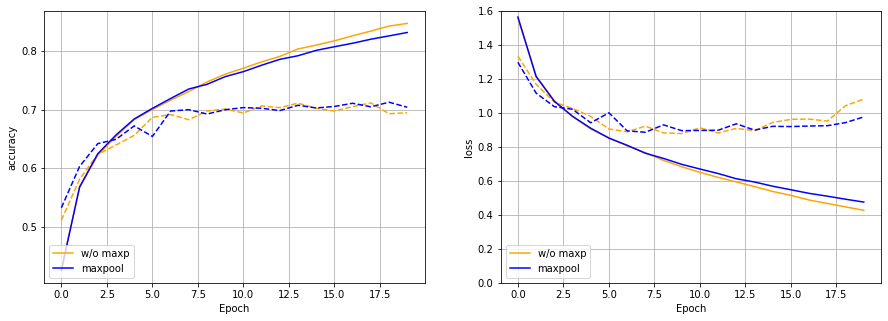

In [52]:
label_list = ['w/o maxp', 'maxpool']
plot_2(history1=history_1, history2=history_3, label_list=label_list, ylim_high=1.6, ylim_low=0)

### Exercise 2. Compare CNN L3_64 vs L3_128 filters

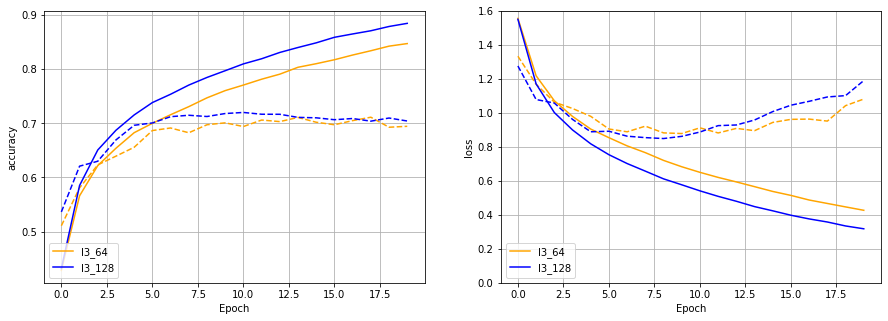

In [50]:
label_list = ['l3_64', 'l3_128']
plot_2(history1=history_1, history2=history_2, label_list=label_list, ylim_high=1.6, ylim_low=0)

### Exercise 3. Compare CNN 64 vs 512 Dense neurons

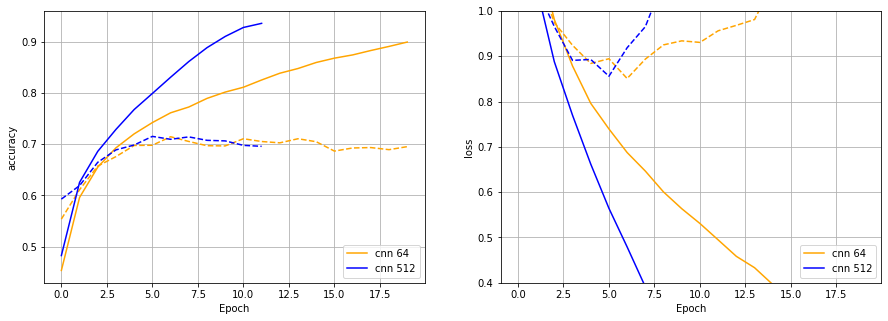

In [ ]:
label_list=['cnn 64', 'cnn 512']
plot_2(history1=history_1, history2=history_4,label_list=label_list, leg_loc='lower right')
plt.show()

### Exercise 4. Compare L1 Regulation

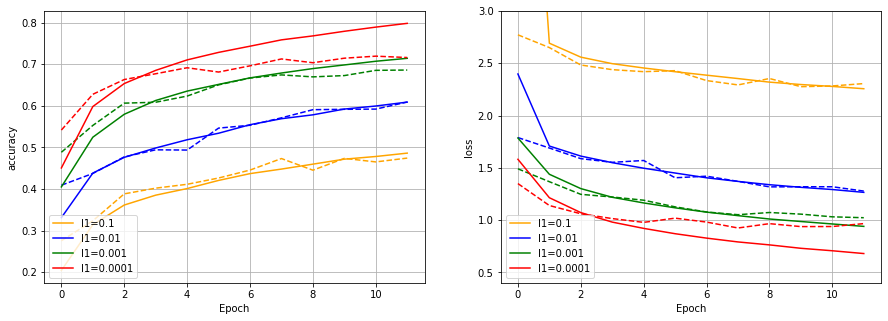

In [ ]:
label_list = ['l1=0.1', 'l1=0.01','l1=0.001', 'l1=0.0001']
plot_4(history1=history_7, history2=history_8, history3=history_9, history4=history_10, label_list=label_list, 
       ylim_high=3)

#### Explanation: 
1. It is clear that when l1=0.0001 (red) was applied, the regularization was really slight, hence the training accuracy reached still 80%, however the validation (broken red) is slight lower than regularized training
2. As we keep increasing the L1 regulazition, the overfitting of training got lower and lower, hence the acuracy on training keep on decreasing, reaching minimum for l1=0.1
3. However, as you realize, with l1=0.01, the training accuracy is still good enough, ~72% (still increasing). and also the validation accuracy curve is closely. Keep in mind that the error on both data is still decreasing, which means we are not in overfitting mode.
4. So, for this particular case, if we choose to use L1-Regulation, the optimal value would be L1=0.01

### Exercise 5. Compare non-regularized vs slight L1=regularized model

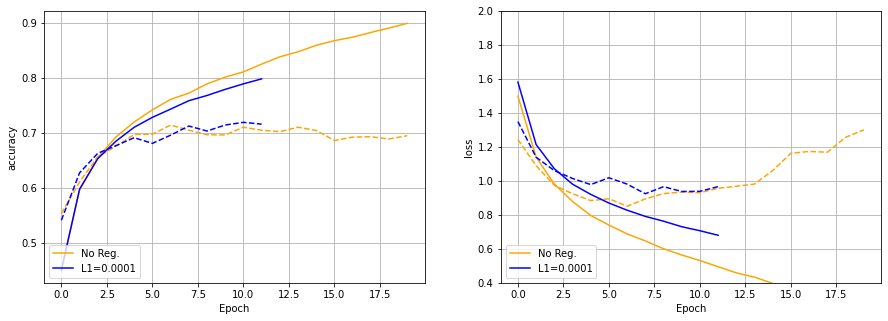

In [ ]:
label_list = ['No Reg.', 'L1=0.0001']
plot_2(history1=history_1, history2=history_10, label_list=label_list, ylim_high=2)

#### Explanation:
1. We already discussed above that slight regulaziation did not have much impact on the training/validation, which is evident here. The curve for both training/validation is just slight shifted from the non-regularized case.

### Exercise 6. Compare non-regularized vs optimal L1 =0.01

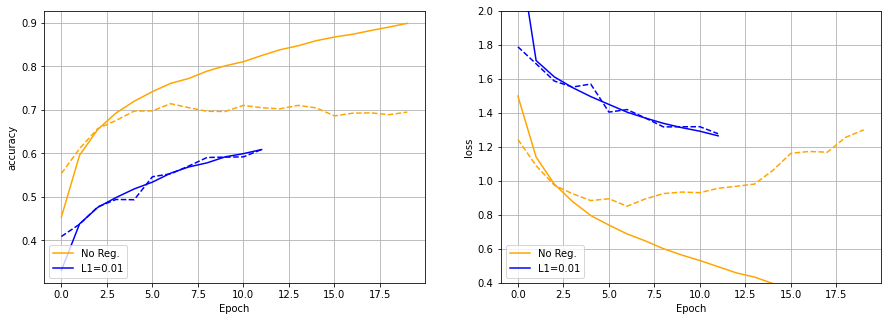

In [ ]:
label_list = ['No Reg.', 'L1=0.01']
plot_2(history1=history_1, history2=history_8, label_list=label_list, ylim_high=2)

#### Explanation:
Here we clearly see how the L1=regularization push down both training/validation accuracy, but has minimized the difference
between training/validation accuracy, ie. the model can better interpret the unseen data. 
Another point is that in case of Regulzaition, the error is still decreasing, ie. we are not in the overfitting mode, and there is chance that we could improve the accuracy with higher epoch values. Hoowever, for non-regularized case, the overfitting already started from epoch value 7

### Exercise 7. Compare non-batch vs batch

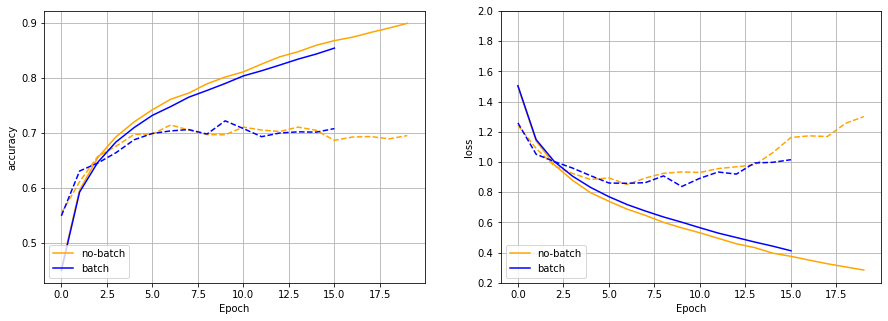

In [ ]:
label_list = ['no-batch', 'batch']
plot_2(history1=history_1, history2=history_11, label_list=label_list, ylim_high=2, ylim_low=0.2)

#### Explanation:
here the batch_size of 32 did not make much difference, however had slight impact on the model, which is understandable, as the
gradient descent is working for batch of 32 and making decision

### Exercise 8. Compare cnn vs vgc model

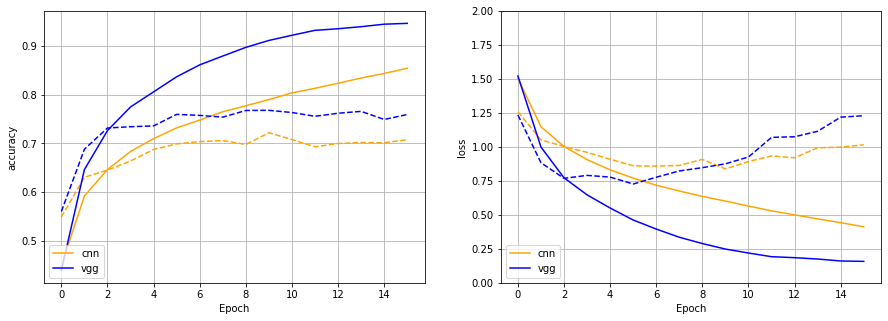

In [ ]:
label_list = ['cnn','vgg']
plot_2(history1=history_11, history2=history_13, label_list=label_list, ylim_high=2, ylim_low=0)

#### Explanation:
1. There is remarkble differnce between the two models, the accuracy of vgg is 98% vs 85% (of cnn)
2. Be noted, both are falling in overfitting mode.

### Exercise 9. Compare cnn vs augmentad cnn

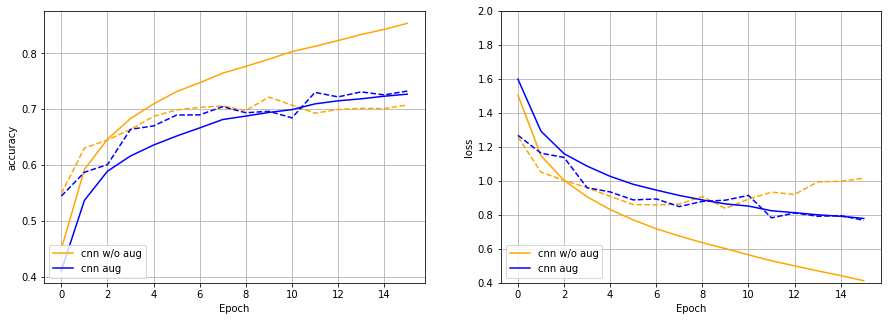

In [ ]:
label_list=['cnn w/o aug','cnn aug']
plot_2(history1=history_11, history2=history_12, label_list=label_list, ylim_high=2)

#### Explanation: 
1. As using the Augmentation decreaes the normality of the trainig data, hence it is more expected to work better on the
unseen data, which is exactly what we are oberving here. For validation with aug, the accuracy is incrased from 70%
to 74%, also w/o falling in overfitting scenerio. 
2. There is still potential to imrpove the aug-model by having higher epoch, as the error is stil decreasing for aug case.

### Exercise 10. Compare cnn-aug vs vgg-aug

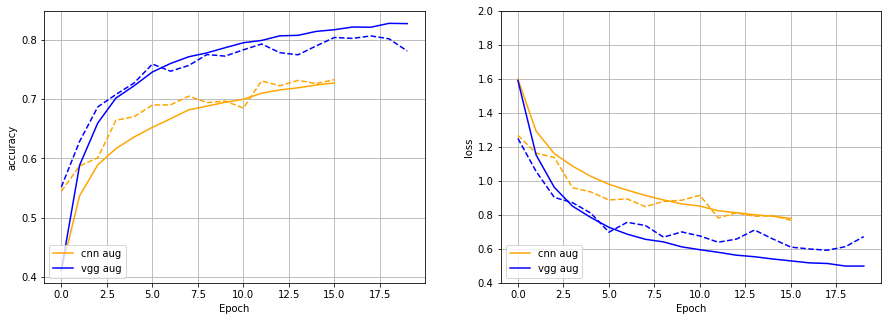

In [ ]:
label_list= ['cnn aug', 'vgg aug']
plot_2(history1=history_12, history2=history_14, label_list=label_list, ylim_high=2)

#### Explanation: 
vgg+augmentation is behaving better, an expected case.

### Exercise 11. Compare cnn vs vgg for all cases

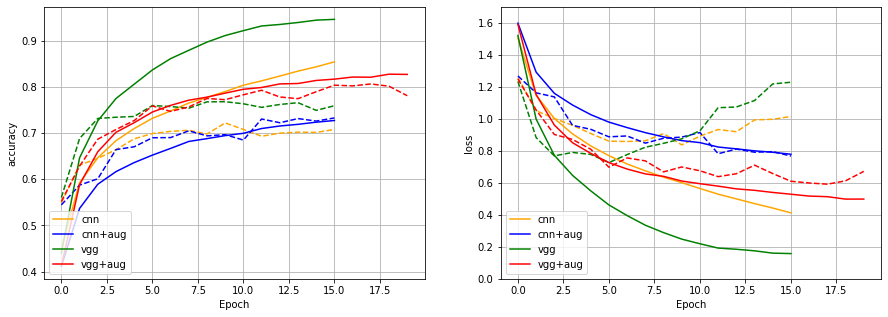

In [ ]:
label_list=['cnn', 'cnn+aug', 'vgg', 'vgg+aug' ]
plot_4(history1=history_11, history2=history_12, history3=history_13, history4=history_14, label_list=label_list, 
       ylim_high=1.7,ylim_low=0)

#### Explanation
The best model is vgg with augmenation

### Exercise 12. Compare vgg, different parameter for Aug

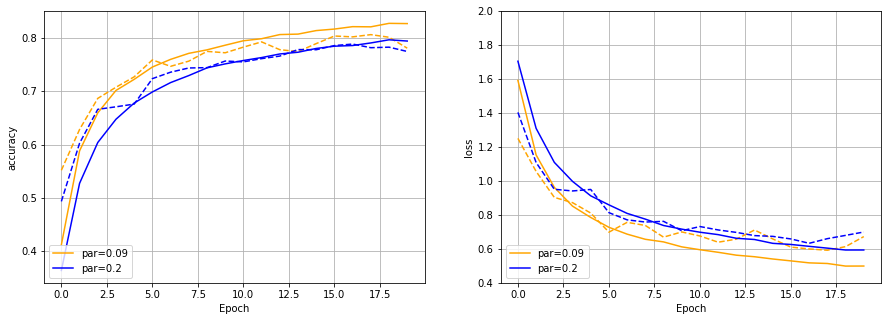

In [ ]:
label_list= ['par=0.09', 'par=0.2']
plot_2(history1=history_14, history2=history_15, label_list=label_list, ylim_high=2)